In [4]:
import torch
from torch.nn import Module, Linear
from torch.nn.functional import tanh

def apply_complex(fr, fi, input, dtype=torch.complex64):
    """Applies a complex linear transformation."""
    return (fr(input.real) - fi(input.imag)).type(dtype) + 1j * (fr(input.imag) + fi(input.real)).type(dtype)

class ComplexTanh(Module):
    """Complex Tanh activation function."""
    @staticmethod
    def forward(inp):
        return tanh(inp.real).type(torch.complex64) + 1j * tanh(inp.imag).type(torch.complex64)

class ComplexLinear(Module):
    """A linear layer for complex-valued input."""
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc_r = Linear(in_features, out_features)
        self.fc_i = Linear(in_features, out_features)

    def forward(self, inp):
        return apply_complex(self.fc_r, self.fc_i, inp)

class ComplexFeedForwardNetwork(Module):
    """A simple feedforward network for complex-valued inputs."""
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()
        self.layer1 = ComplexLinear(in_features, hidden_features)
        self.activation = ComplexTanh()  # Choose from ComplexReLU, ComplexSigmoid, ComplexTanh
        self.layer2 = ComplexLinear(hidden_features, out_features)

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

# Example usage:
# Define the complex-valued input tensor
input_tensor = torch.randn(10, 2, dtype=torch.complex64)  # Example input
print(input_tensor)
# Instantiate and use the complex feedforward network
model = ComplexFeedForwardNetwork(2, 10, 1)
output = model(input_tensor)
print(output)


tensor([[ 1.7028+0.4084j, -0.7135-2.9535j],
        [ 0.2969+0.1886j, -0.3638+0.4396j],
        [ 0.0620+0.3966j,  0.3504-0.6363j],
        [ 0.0196-0.0074j,  0.6489-0.8905j],
        [-0.1504-0.0416j,  0.2283+0.1679j],
        [ 0.3783-0.0611j,  0.1587-0.4463j],
        [-1.0809-0.5795j, -0.5616-1.1929j],
        [-0.1387-0.3943j,  0.0810-0.2659j],
        [-0.0984+1.5212j,  0.5099-0.3171j],
        [-0.0947-0.4073j,  0.3790+0.0938j]])
tensor([[1.2808+0.0613j],
        [0.9792-0.1642j],
        [0.9498+0.0329j],
        [0.7555+0.0204j],
        [0.7612-0.2089j],
        [0.8934-0.1392j],
        [0.7195+0.3256j],
        [0.7304-0.1589j],
        [1.0988+0.1126j],
        [0.6122-0.2793j]], grad_fn=<AddBackward0>)


In [5]:
print(model)

ComplexFeedForwardNetwork(
  (layer1): ComplexLinear(
    (fc_r): Linear(in_features=2, out_features=10, bias=True)
    (fc_i): Linear(in_features=2, out_features=10, bias=True)
  )
  (activation): ComplexTanh()
  (layer2): ComplexLinear(
    (fc_r): Linear(in_features=10, out_features=1, bias=True)
    (fc_i): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [12]:
import torch
from torch.nn import Module, Linear
from torch.nn.functional import tanh

def apply_complex(fr, fi, input, dtype=torch.complex64):
    """Applies a complex linear transformation."""
    return (fr(input.real) - fi(input.imag)).type(dtype) + 1j * (fr(input.imag) + fi(input.real)).type(dtype)

class ComplexTanh(Module):
    @staticmethod
    def forward(inp):
        return tanh(inp.real).type(torch.complex64) + 1j * tanh(inp.imag).type(torch.complex64)

class ComplexLinear(Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc_r = Linear(in_features, out_features)
        self.fc_i = Linear(in_features, out_features)

    def forward(self, inp):
        return apply_complex(self.fc_r, self.fc_i, inp)

class ComplexFeedForwardNetwork(Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()
        self.layer1 = ComplexLinear(in_features, hidden_features)
        self.activation = ComplexTanh()
        self.layer2 = ComplexLinear(hidden_features, out_features)

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

# Generate dataset
n_samples = 1000
x = torch.rand(n_samples, 1) * 2 * torch.pi
y = torch.rand(n_samples, 1) * 2 * torch.pi
z = torch.complex(x, y)
target_z = z**2  # Linear function f(z) = z

# Initialize model
model = ComplexFeedForwardNetwork(1, 10, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Define loss function
def complex_mse_loss(output, target):
    return torch.mean((output.real - target.real) ** 2 + (output.imag - target.imag) ** 2)

# Training loop
epochs = 100000
for epoch in range(epochs):
    prediction = model(z)
    loss = complex_mse_loss(prediction, target_z)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if loss.item() < 1e-2:
        break
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [1000/100000], Loss: 4.7408
Epoch [2000/100000], Loss: 1.9083
Epoch [3000/100000], Loss: 1.0693
Epoch [4000/100000], Loss: 0.6665
Epoch [5000/100000], Loss: 0.4506
Epoch [6000/100000], Loss: 0.3132
Epoch [7000/100000], Loss: 0.2154
Epoch [8000/100000], Loss: 0.1440
Epoch [9000/100000], Loss: 0.0974
Epoch [10000/100000], Loss: 0.0712
Epoch [11000/100000], Loss: 0.0568
Epoch [12000/100000], Loss: 0.0510
Epoch [13000/100000], Loss: 0.0376
Epoch [14000/100000], Loss: 0.0329
Epoch [15000/100000], Loss: 0.0295
Epoch [16000/100000], Loss: 0.0480
Epoch [17000/100000], Loss: 0.0250
Epoch [18000/100000], Loss: 0.0241
Epoch [19000/100000], Loss: 0.0279
Epoch [20000/100000], Loss: 0.0245
Epoch [21000/100000], Loss: 0.0198
Epoch [22000/100000], Loss: 0.0189
Epoch [23000/100000], Loss: 0.0181
Epoch [24000/100000], Loss: 0.0215
Epoch [25000/100000], Loss: 0.0185
Epoch [26000/100000], Loss: 0.0183
Epoch [27000/100000], Loss: 0.0165
Epoch [28000/100000], Loss: 0.0158
Epoch [29000/100000], Loss: 0

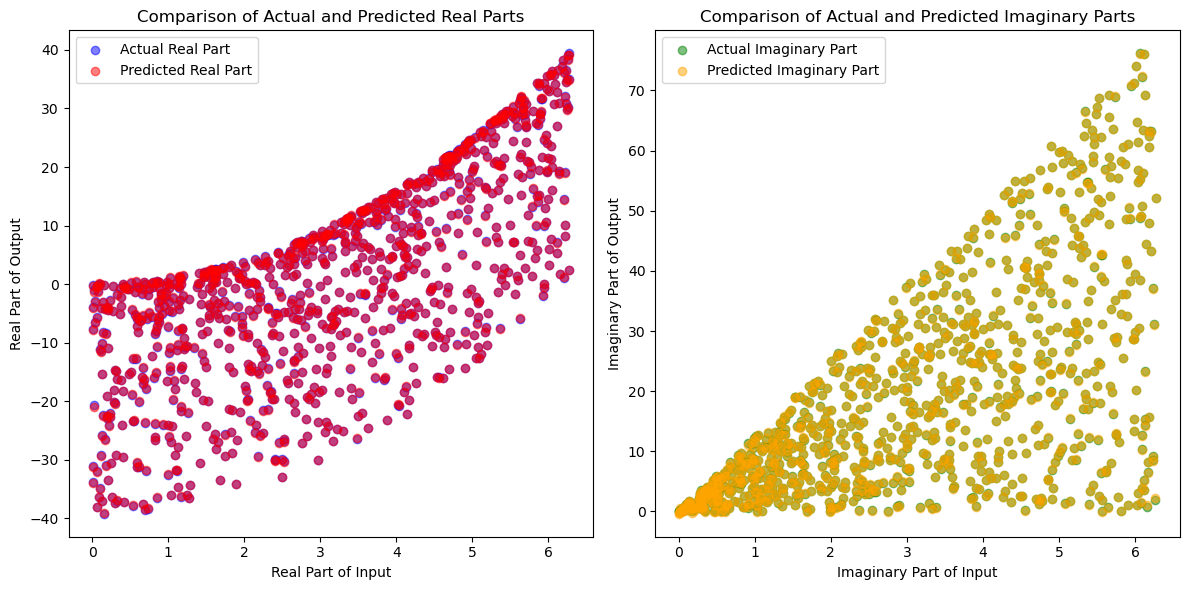

In [13]:
# Post-training: predict and plot
import matplotlib.pyplot as plt
prediction = model(z)

# Detach tensors and convert to NumPy for plotting
z_real_numpy = z.real.detach().numpy()
z_imag_numpy = z.imag.detach().numpy()
sin_z_real_numpy = target_z.real.detach().numpy()
sin_z_imag_numpy = target_z.imag.detach().numpy()
prediction_real_numpy = prediction.real.detach().numpy()
prediction_imag_numpy = prediction.imag.detach().numpy()

# Plotting
plt.figure(figsize=(12, 6))

# Plot real parts
plt.subplot(1, 2, 1)
plt.scatter(z_real_numpy, sin_z_real_numpy, color='blue', alpha=0.5, label='Actual Real Part')
plt.scatter(z_real_numpy, prediction_real_numpy, color='red', alpha=0.5, label='Predicted Real Part')
plt.title('Comparison of Actual and Predicted Real Parts')
plt.xlabel('Real Part of Input')
plt.ylabel('Real Part of Output')
plt.legend()

# Plot imaginary parts
plt.subplot(1, 2, 2)
plt.scatter(z_imag_numpy, sin_z_imag_numpy, color='green', alpha=0.5, label='Actual Imaginary Part')
plt.scatter(z_imag_numpy, prediction_imag_numpy, color='orange', alpha=0.5, label='Predicted Imaginary Part')
plt.title('Comparison of Actual and Predicted Imaginary Parts')
plt.xlabel('Imaginary Part of Input')
plt.ylabel('Imaginary Part of Output')
plt.legend()

plt.tight_layout()
plt.show()


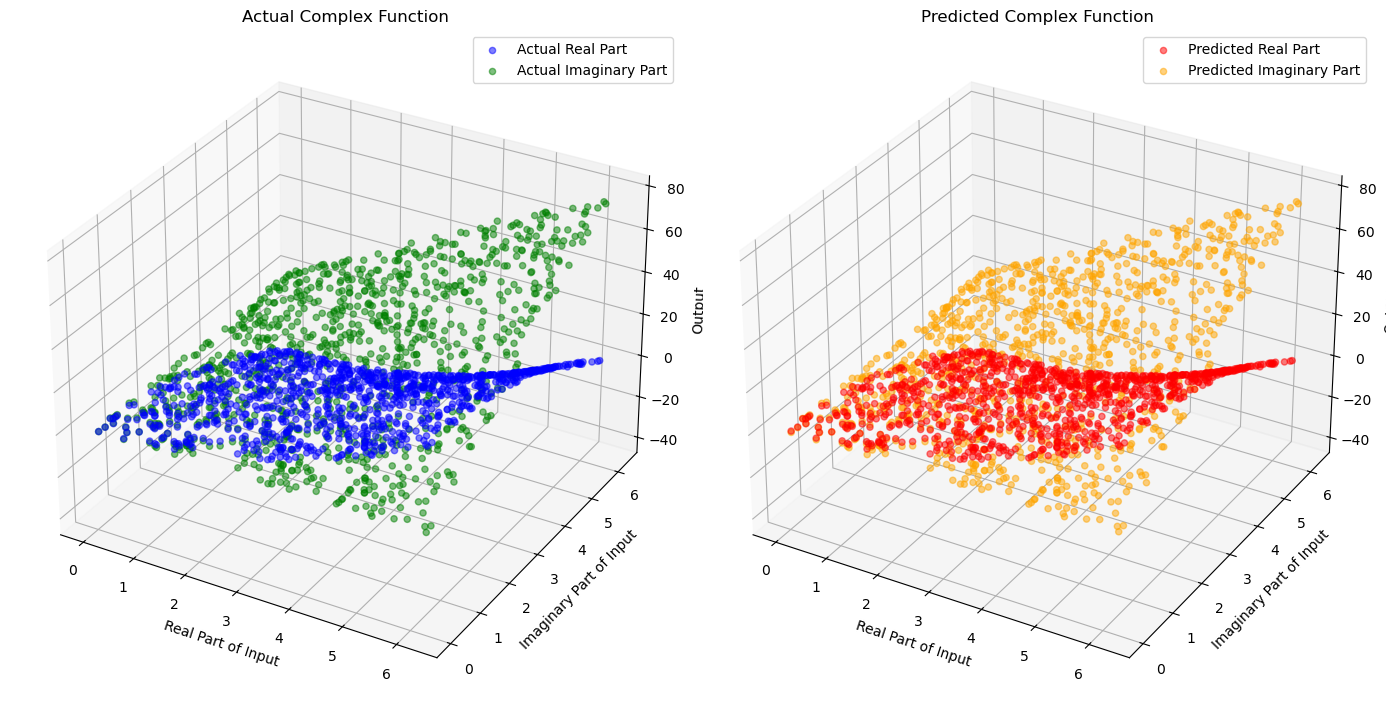

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection

# Assuming 'prediction' is already calculated and available
# Detach tensors and convert to NumPy for plotting
z_real_numpy = z.real.detach().numpy().flatten()
z_imag_numpy = z.imag.detach().numpy().flatten()
sin_z_real_numpy = target_z.real.detach().numpy().flatten()
sin_z_imag_numpy = target_z.imag.detach().numpy().flatten()
prediction_real_numpy = prediction.real.detach().numpy().flatten()
prediction_imag_numpy = prediction.imag.detach().numpy().flatten()

# Plotting
fig = plt.figure(figsize=(14, 7))

# 3D plot for Actual Values
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(z_real_numpy, z_imag_numpy, sin_z_real_numpy, color='blue', alpha=0.5, label='Actual Real Part')
ax1.scatter(z_real_numpy, z_imag_numpy, sin_z_imag_numpy, color='green', alpha=0.5, label='Actual Imaginary Part')
ax1.set_title('Actual Complex Function')
ax1.set_xlabel('Real Part of Input')
ax1.set_ylabel('Imaginary Part of Input')
ax1.set_zlabel('Output')
ax1.legend()

# 3D plot for Predicted Values
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(z_real_numpy, z_imag_numpy, prediction_real_numpy, color='red', alpha=0.5, label='Predicted Real Part')
ax2.scatter(z_real_numpy, z_imag_numpy, prediction_imag_numpy, color='orange', alpha=0.5, label='Predicted Imaginary Part')
ax2.set_title('Predicted Complex Function')
ax2.set_xlabel('Real Part of Input')
ax2.set_ylabel('Imaginary Part of Input')
ax2.set_zlabel('Output')
ax2.legend()

plt.tight_layout()
plt.show()
